# Efficient Forntier part 2

In [4]:
%load_ext autoreload
%autoreload 2

import edhec_risk_kit as erk

ind = erk.get_ind_returns()
er = erk.annualise_rets(ind['1996':'2000'], 12)
cov = ind['1996':'2000'].cov()
er

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Food     1.737299
Beer     1.934940
Smoke    1.668655
Games    1.390869
Books    2.359262
Hshld    1.881619
Clths    1.463624
Hlth     3.010968
Chems    1.452107
Txtls    0.803882
Cnstr    1.497262
Steel    1.729611
FabPr    1.672046
ElcEq    3.335431
Autos    1.475830
Carry    2.229273
Mines    0.759413
Coal     5.666369
Oil      2.149478
Util     1.975787
Telcm    1.784247
Servs    2.242215
BusEq    3.329302
Paper    1.589847
Trans    1.409770
Whlsl    1.813519
Rtail    2.564370
Meals    1.385594
Fin      2.740259
Other    1.236368
dtype: float64


Food     0.116799
Beer     0.141126
Smoke    0.107830
Games    0.068212
Books    0.187286
Hshld    0.134766
Clths    0.079160
Hlth     0.246641
Chems    0.077456
Txtls   -0.042721
Cnstr    0.084076
Steel    0.115809
FabPr    0.108280
ElcEq    0.272420
Autos    0.080954
Carry    0.173904
Mines   -0.053554
Coal     0.414689
Oil      0.165377
Util     0.145903
Telcm    0.122771
Servs    0.175264
BusEq    0.271952
Paper    0.097163
Trans    0.071099
Whlsl    0.126431
Rtail    0.207247
Meals    0.067400
Fin      0.223371
Other    0.043349
dtype: float64

#### def portfolio_return(weights, returns):
    """
    Weights to returns
    """
    return weights.T @ returns

def portfolio_vol(weights, covmat):
    """
    Weights to vol
    """
    return (weights.T @ covmat @ weights)**0.5

In [10]:
l = ["Food", "Beer", "Smoke", "Coal"]
er[l]

Food     0.116799
Beer     0.141126
Smoke    0.107830
Coal     0.414689
dtype: float64

In [11]:
cov.loc[l, l]

,Food,Beer,Smoke,Coal
Food,0.002609,0.002379,0.002061,0.000027
Beer,0.002379,0.005264,0.001359,0.001728
Smoke,0.002061,0.001359,0.008349,-0.000733
Coal,0.000027,0.001728,-0.000733,0.018641


In [15]:
import numpy as np
weights = np.repeat(1/4, 4)
erk.portfolio_return(weights, er[l])

0.19511097196038385

In [16]:
erk.portfolio_vol(weights, cov.loc[l,l])

0.055059195776437045

## 2 asset frontier

In [17]:
l = ['Games', 'Fin']

In [18]:
n_points = 20
weights = [np.array([w, 1-w]) for w in np.linspace(0,1, n_points)]

In [19]:
weights

[array([0., 1.]),
 array([0.05263158, 0.94736842]),
 array([0.10526316, 0.89473684]),
 array([0.15789474, 0.84210526]),
 array([0.21052632, 0.78947368]),
 array([0.26315789, 0.73684211]),
 array([0.31578947, 0.68421053]),
 array([0.36842105, 0.63157895]),
 array([0.42105263, 0.57894737]),
 array([0.47368421, 0.52631579]),
 array([0.52631579, 0.47368421]),
 array([0.57894737, 0.42105263]),
 array([0.63157895, 0.36842105]),
 array([0.68421053, 0.31578947]),
 array([0.73684211, 0.26315789]),
 array([0.78947368, 0.21052632]),
 array([0.84210526, 0.15789474]),
 array([0.89473684, 0.10526316]),
 array([0.94736842, 0.05263158]),
 array([1., 0.])]

In [20]:
len(weights)

20

In [21]:
l

['Games', 'Fin']

In [22]:
rets = [erk.portfolio_return(w, er[l]) for w in weights]

In [23]:
vols = [erk.portfolio_vol(w, cov.loc[l,l]) for w in weights]

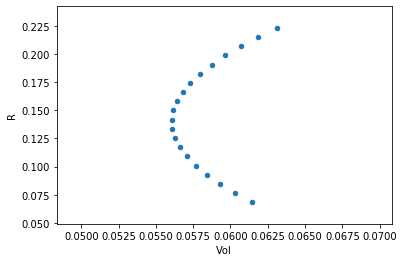

In [24]:
import pandas as pd
ef = pd.DataFrame({"R": rets, "Vol": vols})
ef.plot.scatter(x="Vol", y="R")

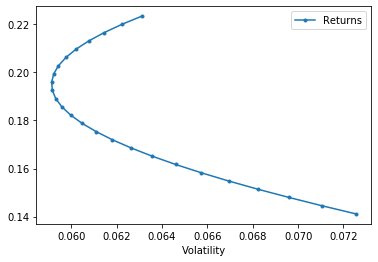

In [28]:
l = ['Fin', 'Beer']
erk.plot_ef2(25, er[l], cov.loc[l,l])